### Candidate Name: Amram Bouskila
### Date Completed: 2/10/2022

# Part 1
---

* Question 1: Report the total number of sales orders processed last month. (The month before current). Today’s date is 2020-01-23.

* Question 2: Rank my store sales (sale_subtotal) based on sales that occured last month. (The month before
current). Today’s date is 2020-01-23. Please report the store name and city the store is located in your query.

* Question 3: Since the beginning of this year, which employee has the most unique sales?

# Part 2
---

My goal is to investigate how big of a problem there is with unsatisfied passengers as well as what might be causing it.

# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import scipy.stats
import statsmodels.api as sm
import pyearth as earth
from tqdm.notebook import tqdm, trange
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score

# read data into dataframe

In [2]:
df = pd.read_excel('satisfaction.xlsx')

In [3]:
pd.set_option('Display.max_columns', 24)

In [4]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


In [5]:
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.mode()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,neutral or dissatisfied,Female,Loyal Customer,39.0,Business travel,Business,337.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129876,129877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129877,129878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129878,129879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I see that the only column with NA values is the Arrival Delay in Minutes and the mode (most common value) is equal to 0, which convinces me that the proper impute value is 0.

In [8]:
df = df.fillna(0)

In [9]:
df.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [10]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


### I want to know all the different inputs for the categorical features so I could decide how to treat these features

In [11]:
df['satisfaction_v2'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [12]:
df['Customer Type'].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [13]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [14]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Converting the satisfaction column to binary in order to convert it into a target variable and train a predictive model

In [15]:
for i in range(len(df)):
    if df.loc[i,'satisfaction_v2'] == 'neutral or dissatisfied':
        df.loc[i,'satisfaction'] = 0
    else: 
        df.loc[i,'satisfaction'] = 1

In [16]:
df = df.drop(['id', 'Gender', 'satisfaction_v2'], axis=1)

In [17]:
df = df.set_index('satisfaction')
df = df.reset_index()
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,1.0,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,1.0,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,1.0,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,1.0,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,Loyal Customer,35,Business travel,Business,2592,5,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0
129876,1.0,Loyal Customer,11,Business travel,Eco,610,5,1,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0
129877,1.0,Loyal Customer,46,Business travel,Business,86,1,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0
129878,1.0,Loyal Customer,35,Business travel,Business,83,1,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0


### Since the majority of the columns are on a scaled from 1-5, I am saving the columns and values in order to feature scale and reframe the data

In [18]:
df_col = df.columns[6:20]
df_col

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [19]:
x = df.values
x = x[:,6:20]
x

array([[0, 2, 0, ..., 3, 4, 3],
       [0, 2, 1, ..., 4, 3, 2],
       [0, 3, 0, ..., 2, 3, 3],
       ...,
       [1, 1, 1, ..., 5, 2, 2],
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 3, ..., 5, 4, 5]], dtype=object)

In [20]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns = df_col)
df_scaled

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.4,0.0,0.8,0.6,0.0,0.6,0.6,0.2,1.0,0.50,0.6,0.8,0.6
1,0.0,0.4,0.2,0.8,0.4,0.2,0.6,0.4,0.2,0.2,0.75,0.8,0.6,0.4
2,0.0,0.6,0.0,0.8,0.6,0.0,0.6,0.6,0.6,1.0,0.50,0.4,0.6,0.6
3,0.0,0.8,0.0,0.6,0.8,0.0,0.8,0.8,1.0,0.8,1.00,1.0,1.0,0.8
4,0.0,1.0,0.0,0.6,0.6,1.0,0.6,0.6,0.6,0.8,1.00,0.6,0.8,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,1.0,0.8,0.4,0.8,1.0,1.0,1.0,1.00,1.0,1.0,0.8
129876,1.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,1.0,0.8,0.00,0.4,1.0,1.0
129877,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.2,0.6,0.00,1.0,0.4,0.4
129878,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.8,0.25,1.0,1.0,1.0


In [21]:
df_scaled['Customer Type'] = df['Customer Type']
df_scaled['Age'] = df['Age']
df_scaled['Type of Travel'] = df['Type of Travel']
df_scaled['Class'] = df['Class']
df_scaled['satisfaction'] = df['satisfaction']
df_scaled['Flight Distance'] = df['Flight Distance']
df_scaled['Departure Delay in Minutes'] = df['Departure Delay in Minutes']
df_scaled['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes']
df_scaled

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type,Age,Type of Travel,Class,satisfaction,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.4,0.0,0.8,0.6,0.0,0.6,0.6,0.2,1.0,0.50,0.6,0.8,0.6,disloyal Customer,56,Personal Travel,Eco,1.0,369,0,0.0
1,0.0,0.4,0.2,0.8,0.4,0.2,0.6,0.4,0.2,0.2,0.75,0.8,0.6,0.4,disloyal Customer,49,Personal Travel,Eco,1.0,2486,0,0.0
2,0.0,0.6,0.0,0.8,0.6,0.0,0.6,0.6,0.6,1.0,0.50,0.4,0.6,0.6,disloyal Customer,55,Personal Travel,Eco,1.0,1448,0,0.0
3,0.0,0.8,0.0,0.6,0.8,0.0,0.8,0.8,1.0,0.8,1.00,1.0,1.0,0.8,disloyal Customer,36,Personal Travel,Eco,1.0,1501,0,0.0
4,0.0,1.0,0.0,0.6,0.6,1.0,0.6,0.6,0.6,0.8,1.00,0.6,0.8,0.6,disloyal Customer,55,Personal Travel,Eco,1.0,577,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,1.0,0.8,0.4,0.8,1.0,1.0,1.0,1.00,1.0,1.0,0.8,Loyal Customer,35,Business travel,Business,1.0,2592,0,0.0
129876,1.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,1.0,0.8,0.00,0.4,1.0,1.0,Loyal Customer,11,Business travel,Eco,1.0,610,82,65.0
129877,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.2,0.6,0.00,1.0,0.4,0.4,Loyal Customer,46,Business travel,Business,1.0,86,0,0.0
129878,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.8,0.25,1.0,1.0,1.0,Loyal Customer,35,Business travel,Business,1.0,83,0,0.0


### Now, the goal is to OneHotEncode the categorical features

In [22]:
df_scaled = pd.get_dummies(df_scaled)
df_scaled

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,...,Age,satisfaction,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,0.4,0.0,0.8,0.6,0.0,0.6,0.6,0.2,1.0,0.50,0.6,...,56,1.0,369,0,0.0,0,1,0,1,0,1,0
1,0.0,0.4,0.2,0.8,0.4,0.2,0.6,0.4,0.2,0.2,0.75,0.8,...,49,1.0,2486,0,0.0,0,1,0,1,0,1,0
2,0.0,0.6,0.0,0.8,0.6,0.0,0.6,0.6,0.6,1.0,0.50,0.4,...,55,1.0,1448,0,0.0,0,1,0,1,0,1,0
3,0.0,0.8,0.0,0.6,0.8,0.0,0.8,0.8,1.0,0.8,1.00,1.0,...,36,1.0,1501,0,0.0,0,1,0,1,0,1,0
4,0.0,1.0,0.0,0.6,0.6,1.0,0.6,0.6,0.6,0.8,1.00,0.6,...,55,1.0,577,0,0.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,1.0,0.8,0.4,0.8,1.0,1.0,1.0,1.00,1.0,...,35,1.0,2592,0,0.0,1,0,1,0,1,0,0
129876,1.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,1.0,0.8,0.00,0.4,...,11,1.0,610,82,65.0,1,0,1,0,0,1,0
129877,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.2,0.6,0.00,1.0,...,46,1.0,86,0,0.0,1,0,1,0,1,0,0
129878,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.8,0.25,1.0,...,35,1.0,83,0,0.0,1,0,1,0,1,0,0


### In order to improve the appearance of the dataframe, I will bring the satisfaction column to the front

In [23]:
df_scaled = df_scaled.set_index('satisfaction')
df_scaled = df_scaled.reset_index()
df_scaled

,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,...,Cleanliness,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.4,0.0,0.8,0.6,0.0,0.6,0.6,0.2,1.0,0.50,...,0.6,56,369,0,0.0,0,1,0,1,0,1,0
1,1.0,0.0,0.4,0.2,0.8,0.4,0.2,0.6,0.4,0.2,0.2,0.75,...,0.4,49,2486,0,0.0,0,1,0,1,0,1,0
2,1.0,0.0,0.6,0.0,0.8,0.6,0.0,0.6,0.6,0.6,1.0,0.50,...,0.6,55,1448,0,0.0,0,1,0,1,0,1,0
3,1.0,0.0,0.8,0.0,0.6,0.8,0.0,0.8,0.8,1.0,0.8,1.00,...,0.8,36,1501,0,0.0,0,1,0,1,0,1,0
4,1.0,0.0,1.0,0.0,0.6,0.6,1.0,0.6,0.6,0.6,0.8,1.00,...,0.6,55,577,0,0.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,1.0,1.0,0.8,0.4,0.8,1.0,1.0,1.0,1.00,...,0.8,35,2592,0,0.0,1,0,1,0,1,0,0
129876,1.0,1.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,1.0,0.8,0.00,...,1.0,11,610,82,65.0,1,0,1,0,0,1,0
129877,1.0,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.2,0.6,0.00,...,0.4,46,86,0,0.0,1,0,1,0,1,0,0
129878,1.0,0.2,0.2,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.8,0.25,...,1.0,35,83,0,0.0,1,0,1,0,1,0,0


In [24]:
df_scaled[df_scaled['satisfaction']==0]

,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,...,Cleanliness,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
5,0.0,0.2,0.0,0.2,0.8,0.2,0.2,0.2,0.2,1.0,0.6,1.00,...,0.2,15,2704,0,0.0,0,1,0,1,0,1,0
6,0.0,0.2,0.0,0.2,0.8,0.2,0.2,0.2,0.2,1.0,0.6,1.00,...,0.2,51,1746,20,22.0,0,1,0,1,0,1,0
7,0.0,0.2,0.2,0.2,0.6,0.4,0.2,0.4,0.4,0.4,1.0,0.25,...,0.4,26,650,0,0.0,0,1,0,1,0,1,0
8,0.0,0.2,0.2,0.2,0.8,0.4,0.2,0.4,0.4,0.4,1.0,0.50,...,0.4,37,1773,5,4.0,0,1,0,1,0,1,0
9,0.0,0.2,0.2,0.2,0.8,0.8,0.2,0.8,0.8,0.6,0.8,0.75,...,0.8,65,584,0,13.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111143,0.0,1.0,0.2,0.2,0.2,1.0,0.8,1.0,1.0,0.2,0.4,0.75,...,1.0,30,1090,0,0.0,1,0,1,0,0,0,1
111151,0.0,1.0,0.6,0.6,0.6,1.0,0.8,1.0,1.0,0.4,0.4,0.50,...,1.0,28,444,2,1.0,1,0,1,0,0,1,0
111154,0.0,1.0,0.4,0.4,0.4,0.4,0.6,0.6,1.0,1.0,0.8,1.00,...,0.6,53,236,1,9.0,1,0,1,0,1,0,0
111157,0.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.6,0.6,0.50,...,1.0,27,1172,0,0.0,1,0,1,0,0,0,1


In [25]:
round(len(df_scaled[df_scaled['satisfaction']==0])/len(df_scaled)*100,2)

56.55

### Out of the 129,880 reviews, 73,452 of these reviews are 'neutral or dissatisfied', which means that 56.55% of customers are not satisfied.

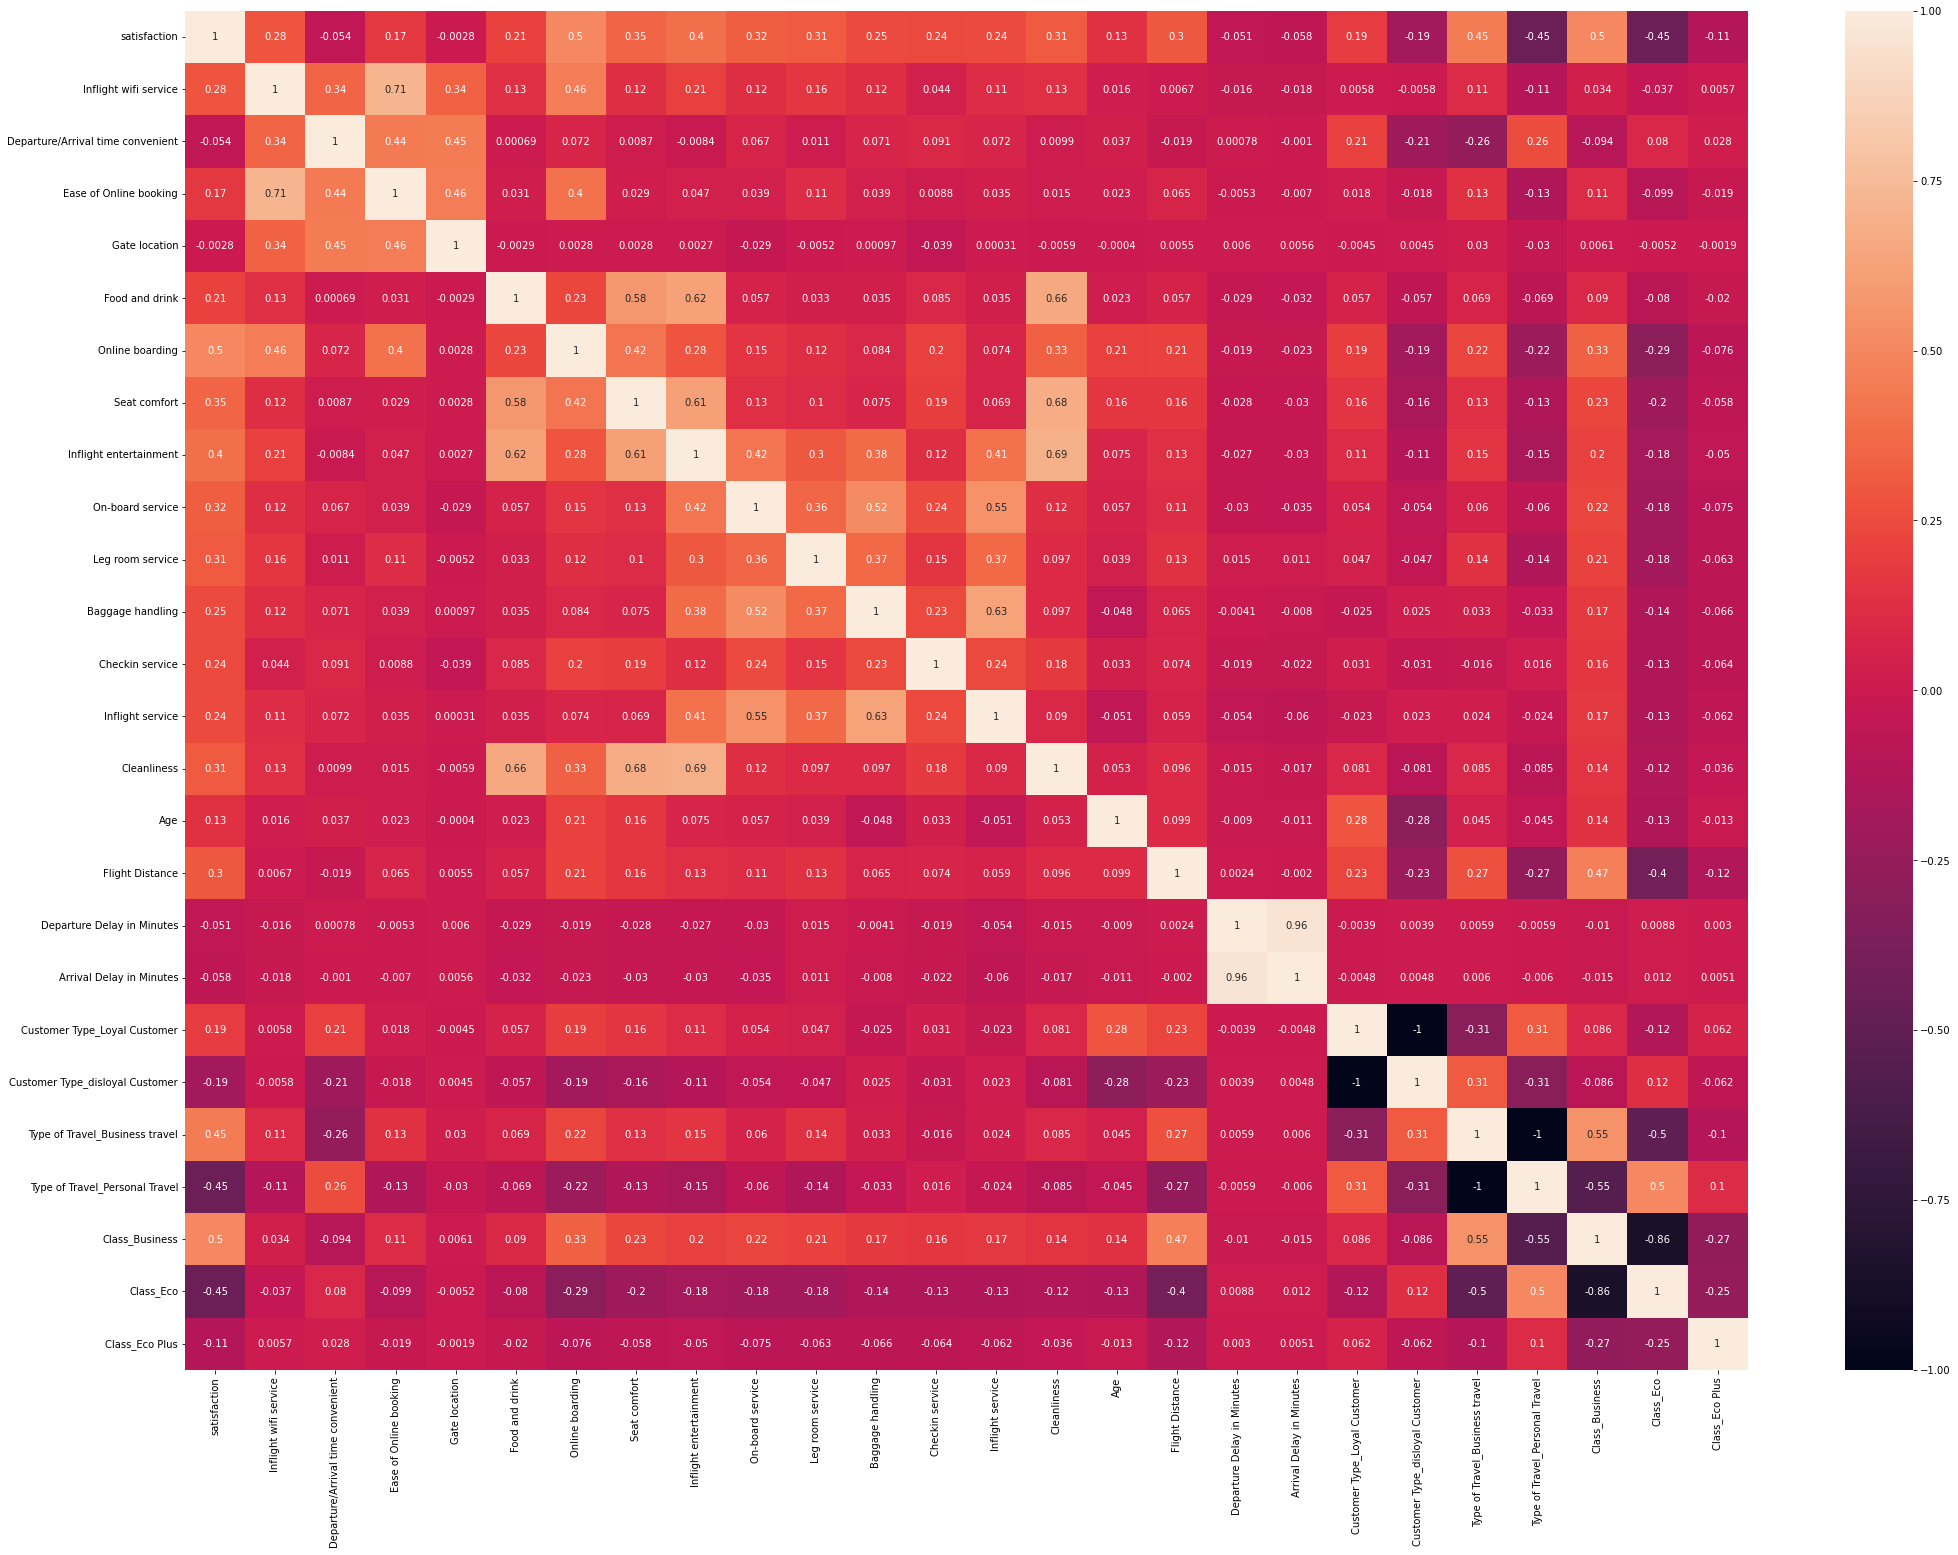

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35,25))
sns.heatmap(df_scaled.corr(), annot=True, vmin=-1, vmax=1);

### It seems as if there are some features that are not correlated with satisfying guests, which tells me that this airline rarely ever has delays. Hence, I will remove those columns to speed up the machine learning process.

In [27]:
df_scaled = df_scaled.drop('Gate location', axis=1)
df_scaled = df_scaled.drop('Departure/Arrival time convenient', axis=1)
df_scaled = df_scaled.drop('Departure Delay in Minutes', axis=1)
df_scaled = df_scaled.drop('Arrival Delay in Minutes', axis=1)
df_scaled

,satisfaction,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.0,0.6,0.0,0.6,0.6,0.2,1.0,0.50,0.6,0.8,0.6,56,369,0,1,0,1,0,1,0
1,1.0,0.0,0.2,0.4,0.2,0.6,0.4,0.2,0.2,0.75,0.8,0.6,0.4,49,2486,0,1,0,1,0,1,0
2,1.0,0.0,0.0,0.6,0.0,0.6,0.6,0.6,1.0,0.50,0.4,0.6,0.6,55,1448,0,1,0,1,0,1,0
3,1.0,0.0,0.0,0.8,0.0,0.8,0.8,1.0,0.8,1.00,1.0,1.0,0.8,36,1501,0,1,0,1,0,1,0
4,1.0,0.0,0.0,0.6,1.0,0.6,0.6,0.6,0.8,1.00,0.6,0.8,0.6,55,577,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,0.8,0.4,0.8,1.0,1.0,1.0,1.00,1.0,1.0,0.8,35,2592,1,0,1,0,1,0,0
129876,1.0,1.0,0.2,1.0,1.0,1.0,1.0,1.0,0.8,0.00,0.4,1.0,1.0,11,610,1,0,1,0,0,1,0
129877,1.0,0.2,0.2,1.0,1.0,1.0,1.0,0.2,0.6,0.00,1.0,0.4,0.4,46,86,1,0,1,0,1,0,0
129878,1.0,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.8,0.25,1.0,1.0,1.0,35,83,1,0,1,0,1,0,0


In [28]:
df_scaled.shape

(129880, 22)

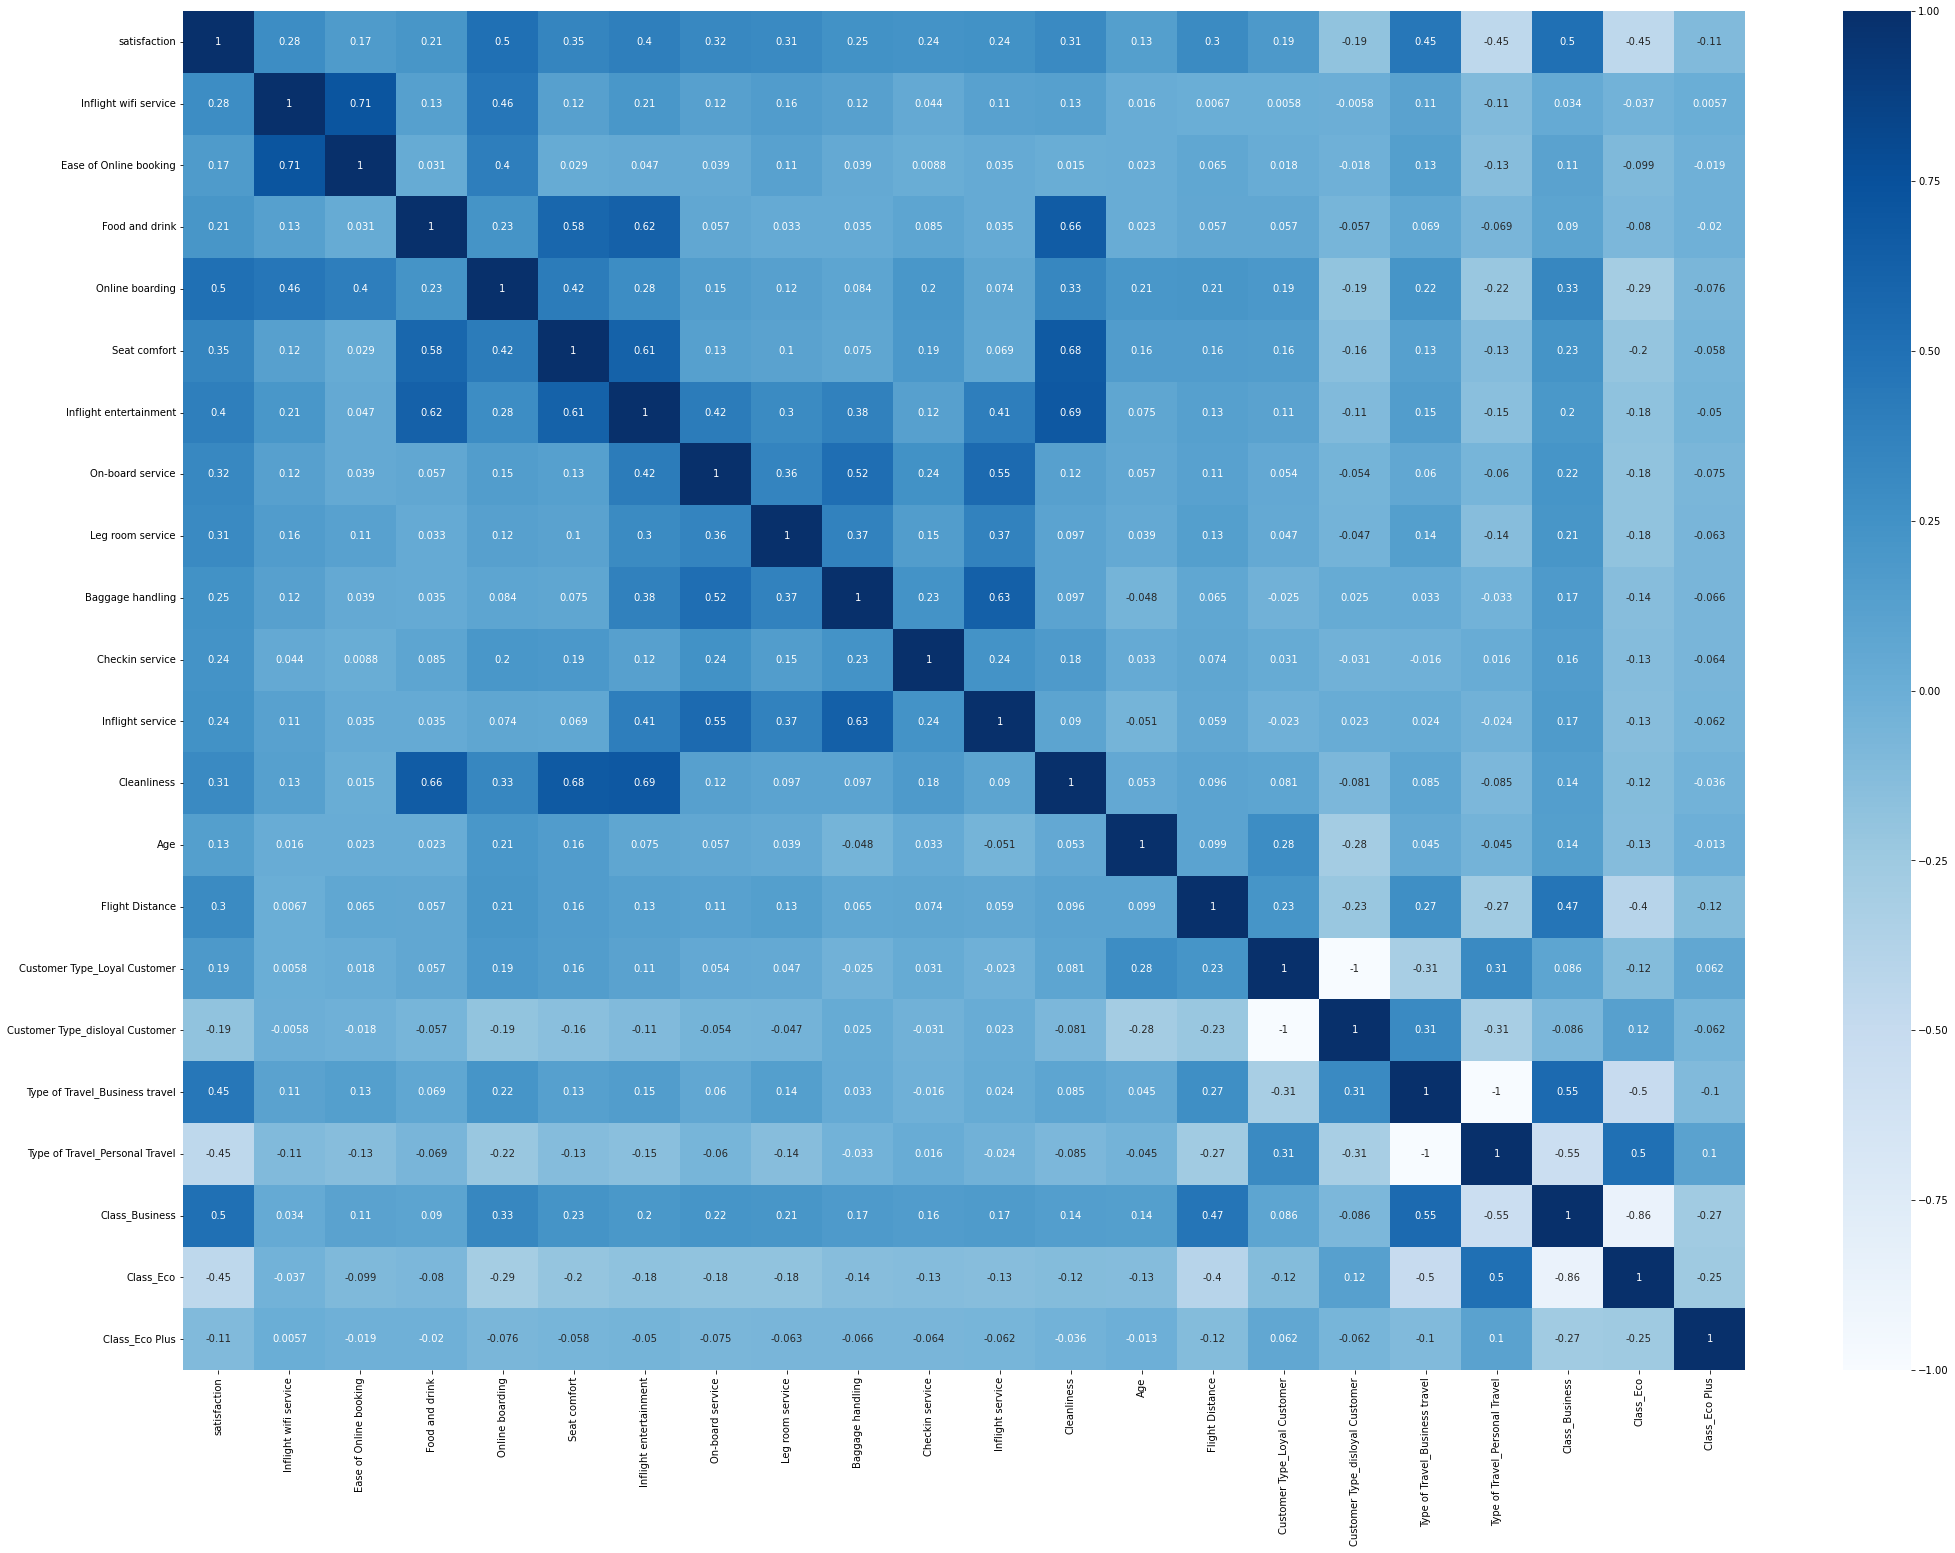

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35,25))
sns.heatmap(df_scaled.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

## It seems that guests who travel business class and are traveling for business are the most likely to leave satisfied. Conversely, guests who are traveling in the eco class and are traveling for pleasure are the most likely to leave unsatisfied.

## Among the flight services rated from 1-5, high ratings with Cleanliness, Food and Drink, Online Boarding, and Inflight Entertainment were the most correlated with a satisifed guest. Moreover, cleanliness seems to be the confounding variable for most inflight amenities.

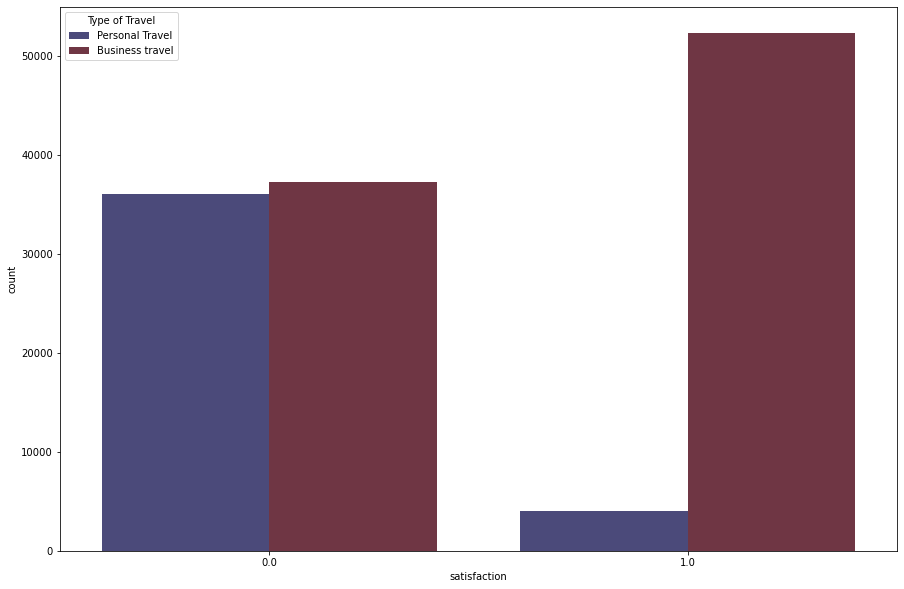

In [30]:
# This plot clearly shows how guests who travel for business are way more likely to be satisfied
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.countplot(x='satisfaction',data=df,hue='Type of Travel', palette='icefire');

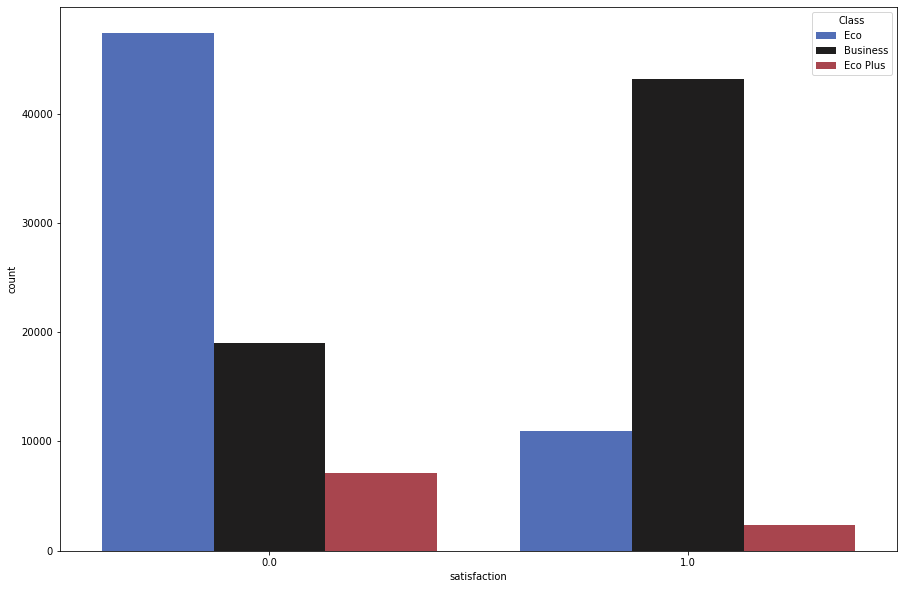

In [31]:
# This plot clearly shows how guests who travel business class are way more likely to be satisfied
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.countplot(x='satisfaction',data=df,hue='Class', palette='icefire');

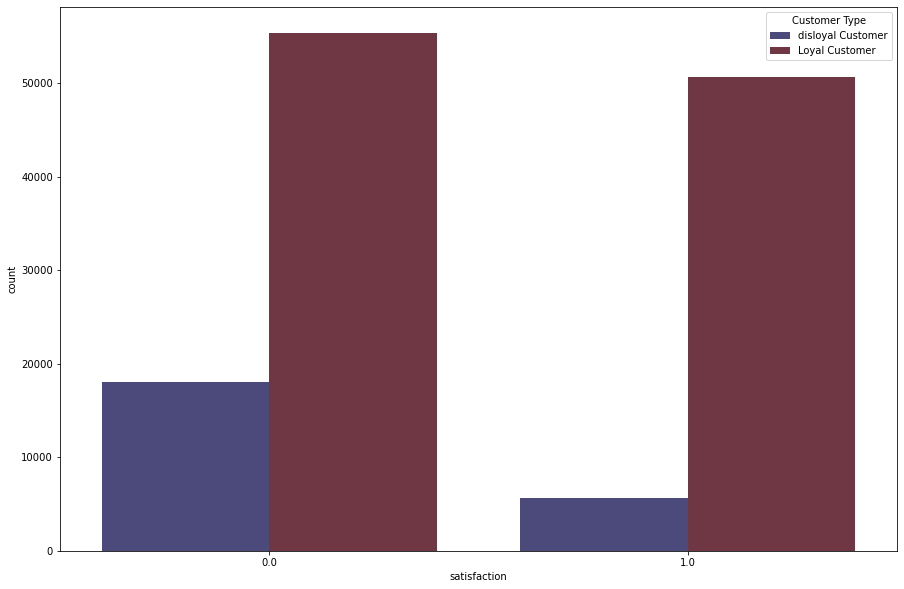

In [32]:
# This plot shows that there are more disloyal customers that are unsatisfied than satisfied
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.countplot(x='satisfaction',data=df,hue='Customer Type', palette='icefire');

In [33]:
df_scaled.shape

(129880, 22)

# In order to build a predictive model, the dataframe needs to be split into training and testing sets

In [34]:
X = df_scaled.drop(['satisfaction'], axis=1)
y = df_scaled['satisfaction']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33)

In [36]:
res = scipy.stats.ttest_ind(X, y)
res

Ttest_indResult(statistic=array([  71.29543467,   73.98737283,  132.28733716,  137.93461831,
        162.89144199,  151.82460759,  156.23689699,  151.35409438,
        139.67779982,  146.83546738,  193.07930391,  143.12560821,
        928.95913231,  429.91514243,  219.22475315, -144.0902267 ,
        136.18440658,  -66.48943175,   22.60073561,    7.43274532,
       -233.22215845]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 5.48232566e-113, 1.06690693e-013,
       0.00000000e+000]))

In [37]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     8756.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:41:40   Log-Likelihood:                -41534.
No. Observations:              129880   AIC:                         8.311e+04
Df Residuals:                  129861   BIC:                         8.329e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflight w

In [38]:
scipy.stats.zscore(X)

,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-2.052677,-1.966761,-0.153973,-2.408085,-0.334546,-0.268414,-1.851475,1.252898,-0.535681,-0.241883,0.304086,-0.217958,1.096085,-0.823417,-2.112281,2.112281,-1.493951,1.493951,-0.958070,1.107900,-0.279499
1,-2.052677,-1.253359,-0.905894,-1.667736,-0.334546,-1.018015,-1.851475,-1.786046,0.311762,0.547894,-0.545774,-0.979180,0.633101,1.298998,-2.112281,2.112281,-1.493951,1.493951,-0.958070,1.107900,-0.279499
2,-2.052677,-1.966761,-0.153973,-2.408085,-0.334546,-0.268414,-0.297587,1.252898,-0.535681,-1.031660,-0.545774,-0.217958,1.029945,0.258343,-2.112281,2.112281,-1.493951,1.493951,-0.958070,1.107900,-0.279499
3,-2.052677,-1.966761,0.597947,-2.408085,0.423441,0.481186,1.256300,0.493162,1.159206,1.337671,1.153946,0.543264,-0.226727,0.311478,-2.112281,2.112281,-1.493951,1.493951,-0.958070,1.107900,-0.279499
4,-2.052677,-1.966761,-0.153973,1.293662,-0.334546,-0.268414,-0.297587,0.493162,1.159206,-0.241883,0.304086,-0.217958,1.029945,-0.614885,-2.112281,2.112281,-1.493951,1.493951,-0.958070,1.107900,-0.279499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.708602,1.600249,0.597947,-0.927386,0.423441,1.230787,1.256300,1.252898,1.159206,1.337671,1.153946,0.543264,-0.292868,1.405269,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499
129876,1.708602,-1.253359,1.349867,1.293662,1.181428,1.230787,1.256300,0.493162,-2.230567,-1.031660,1.153946,1.304487,-1.880243,-0.581801,0.473422,-0.473422,0.669366,-0.669366,-0.958070,1.107900,-0.279499
129877,-1.300421,-1.253359,1.349867,1.293662,1.181428,1.230787,-1.851475,-0.266574,-2.230567,1.337671,-1.395634,-0.979180,0.434679,-1.107141,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499
129878,-1.300421,-1.253359,1.349867,1.293662,1.181428,1.230787,0.479357,0.493162,-1.383124,1.337671,1.153946,1.304487,-0.292868,-1.110149,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499


# Using the MARS (Multivariate Adaptive Regression Splines) Model to understand interaction variables, and not as a predictive model.

In [39]:
model = earth.Earth(max_degree=3,
                    max_terms=10,
                    minspan_alpha=.5,
                    feature_importance_type='gcv',
                    verbose=True)

In [40]:
model.fit(X_train, y_train)

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.245645  1      0.246  0.000  0.000  
1     0       3    -1    0.183691  2      0.184  0.252  0.252  
2     1       16   -1    0.144128  3      0.144  0.413  0.413  
3     1       3    -1    0.126942  4      0.127  0.483  0.483  
4     2       6    -1    0.117128  5      0.117  0.523  0.523  
5     0       15   -1    0.109475  6      0.110  0.554  0.554  
6     3       3    -1    0.106034  7      0.106  0.568  0.568  
7     0       0    -1    0.103380  8      0.103  0.579  0.579  
8     7       0    -1    0.089912  9      0.090  0.634  0.634  
9     2       0    -1    0.086406  10     0.086  0.648  0.648  
10    2       9    -1    0.083771  11     0.084  0.659  0.659  
---------------------------------------------------------------
Stopping Conditio

C:\ProgramData\Anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


1     6   10     0.09  0.085  0.653  0.653  
2     2   9      0.09  0.087  0.646  0.646  
3     1   8      0.09  0.089  0.638  0.638  
4     3   7      0.09  0.089  0.637  0.637  
5     9   6      0.09  0.091  0.630  0.630  
6     10  5      0.10  0.095  0.611  0.611  
7     5   4      0.10  0.105  0.574  0.574  
8     7   3      0.13  0.126  0.488  0.488  
9     8   2      0.13  0.134  0.454  0.454  
10    4   1      0.25  0.246  0.000  0.000  
--------------------------------------------
Selected iteration: 0


C:\ProgramData\Anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(feature_importance_type='gcv', max_degree=3, max_terms=10,
      minspan_alpha=0.5, verbose=True)

In [41]:
print(model.trace())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.245645  1      0.246  0.000  0.000  
1     0       3    -1    0.183691  2      0.184  0.252  0.252  
2     1       16   -1    0.144128  3      0.144  0.413  0.413  
3     1       3    -1    0.126942  4      0.127  0.483  0.483  
4     2       6    -1    0.117128  5      0.117  0.523  0.523  
5     0       15   -1    0.109475  6      0.110  0.554  0.554  
6     3       3    -1    0.106034  7      0.106  0.568  0.568  
7     0       0    -1    0.103380  8      0.103  0.579  0.579  
8     7       0    -1    0.089912  9      0.090  0.634  0.634  
9     2       0    -1    0.086406  10     0.086  0.648  0.648  
10    2       9    -1    0.083771  11     0.084  0.659  0.659  
---------------------------------------------------------------
Stopping Condition 0: Reach

In [42]:
print(model.summary())

Earth Model
-------------------------------------------------------------------------------------------
Basis Function                                                        Pruned  Coefficient  
-------------------------------------------------------------------------------------------
(Intercept)                                                           No      0.697672     
Online boarding                                                       No      -2.46415     
Type of Travel_Business travel*Online boarding                        No      0.371379     
Online boarding*Online boarding                                       No      3.83731      
On-board service*Type of Travel_Business travel*Online boarding       No      0.573128     
Customer Type_disloyal Customer                                       No      -0.22786     
Online boarding*Online boarding*Online boarding                       No      -1.74827     
Inflight wifi service                                               

In [43]:
model = earth.Earth(feature_importance_type='gcv', 
                    max_degree=2, 
                    penalty=0.5, 
                    minspan_alpha=1, 
                    endspan_alpha=1,
                    allow_linear=False,
                    check_every=1,
                    verbose=True)
model.fit(X_train,y_train)

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.245645  1      0.246  0.000  0.000  
1     0       3    71736  0.158657  3      0.159  0.354  0.354  
2     1       16   -1    0.131410  4      0.131  0.465  0.465  
3     0       0    63441  0.113775  6      0.114  0.537  0.537  
4     0       18   -1    0.102028  7      0.102  0.585  0.585  
5     6       5    5582  0.093638  9      0.094  0.619  0.619  
6     6       0    63441  0.087443  11     0.087  0.644  0.644  
7     0       0    19296  0.080897  13     0.081  0.671  0.671  
8     6       7    21397  0.078325  15     0.078  0.681  0.681  
9     1       0    19296  0.075957  17     0.076  0.691  0.691  
10    0       14   -1    0.074322  18     0.074  0.697  0.697  
11    17      17   -1    0.072461  19     0.073  0.705  0.705  
12    6    

C:\ProgramData\Anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   67     0.06  0.056  0.772  0.772  
1     5   66     0.06  0.056  0.772  0.772  
2     34  65     0.06  0.056  0.772  0.772  
3     15  64     0.06  0.056  0.772  0.772  
4     22  63     0.06  0.056  0.772  0.772  
5     11  62     0.06  0.056  0.772  0.772  
6     43  61     0.06  0.056  0.772  0.772  
7     39  60     0.06  0.056  0.772  0.772  
8     48  59     0.06  0.056  0.772  0.772  
9     52  58     0.06  0.056  0.772  0.771  
10    21  57     0.06  0.056  0.772  0.771  
11    62  56     0.06  0.056  0.771  0.771  
12    2   55     0.06  0.056  0.771  0.771  
13    55  54     0.06  0.056  0.771  0.771  
14    33  53     0.06  0.056  0.771  0.770  
15    7   52     0.06  0.056  0.770  0.770  
16    41  51     0.06  0.057  0.770  0.770  
17    14  50     0.06  0.057  0.770  0.770  
18    35  49     0.06  0.057  0.770  0.769  
19    66  

C:\ProgramData\Anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=False, check_every=1, endspan_alpha=1,
      feature_importance_type='gcv', max_degree=2, minspan_alpha=1, penalty=0.5,
      verbose=True)

In [44]:
print(model.summary_feature_importances(sort_by='gcv'))

                                    gcv
Online boarding                     0.35   
Type of Travel_Business travel      0.33   
Inflight wifi service               0.12   
Class_Business                      0.10   
Inflight entertainment              0.03   
Customer Type_Loyal Customer        0.03   
Ease of Online booking              0.01   
Leg room service                    0.01   
Type of Travel_Personal Travel      0.01   
Checkin service                     0.01   
Baggage handling                    0.00   
Seat comfort                        0.00   
Cleanliness                         0.00   
Inflight service                    0.00   
On-board service                    0.00   
Class_Eco                           0.00   
Age                                 0.00   
Flight Distance                     0.00   
Food and drink                      0.00   
Customer Type_disloyal Customer     0.00   
Class_Eco Plus                      0.00   



# Over here, we get to see the interaction effects between features and their importance.

In [45]:
print(model.summary())

Earth Model
----------------------------------------------------------------------------------
Basis Function                                               Pruned  Coefficient  
----------------------------------------------------------------------------------
(Intercept)                                                  No      -1.77567     
h(Online boarding-0.6)                                       No      1.76795      
h(0.6-Online boarding)                                       No      -0.266962    
Type of Travel_Business travel*h(Online boarding-0.6)        No      0.924368     
h(Inflight wifi service-0.2)                                 No      4.16329      
h(0.2-Inflight wifi service)                                 Yes     None         
Class_Business                                               No      0.413937     
h(Inflight entertainment-0.8)*Class_Business                 No      -0.249263    
h(0.8-Inflight entertainment)*Class_Business                 No      -0.441

## As shown above, the most relevant feature interactions are Inflight Wifi service, Inflight Entertainment, Online Boarding, Ease of Online Booking, and Type of Travel. I recommend focusing on personal travel customers who are traveling in eco and eco plus, as well as making the online boarding process easier and the inflight entertainment and cleanliness exceptional.

# Part 3
---

## Model Selection
---
#### Find multiple models to compare in order to chose 2 final models to use for prediction
#### To compare models we will use multiple params and allow the grid search tool to optimize our comparable models
#### Model selection will be done by choosing the models by scoring (different problems require different scoring techniques)

### Support Vector Classifier and K-Nearest Neighbors take an unreasonably long amount of time to fit a large dataset

In [46]:
param_grid_nb = [{}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini', 'entropy'], 'max_depth':[2,3], 'min_samples_split':[3,5]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10,30,50],'max_features':[0.2, 0.4], 'bootstrap':[True, False]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[10,30,50],'learning_rate':[0.1,1]}]
param_grid_lr = [{'random_state':[1]},{'solver':['liblinear','sag','newton-cg']}]

model_names = ['NB','Tree','RF','Boosting','LR']

def init_classifiers():
    return([
            (GaussianNB(), model_names[0], param_grid_nb),
            (DecisionTreeClassifier(), model_names[1], param_grid_tree),
            (RandomForestClassifier(), model_names[2], param_grid_rf),
            (AdaBoostClassifier(), model_names[3], param_grid_boost),
            (LogisticRegression(), model_names[4], param_grid_lr)
           ])

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=6, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

  0%|          | 0/5 [00:00<?, ?it/s]

Precision: 0.8285205597790547
Best Estimator: GaussianNB()


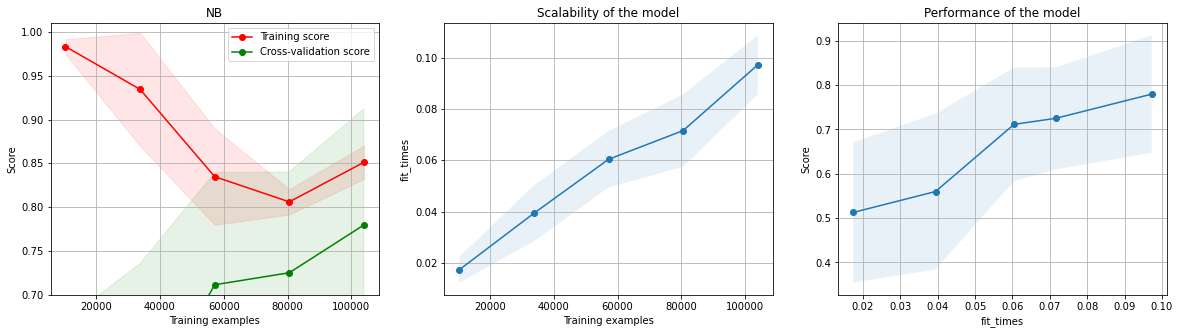

Precision: 0.8398127357038632
Best Estimator: DecisionTreeClassifier(max_depth=2, min_samples_split=3)


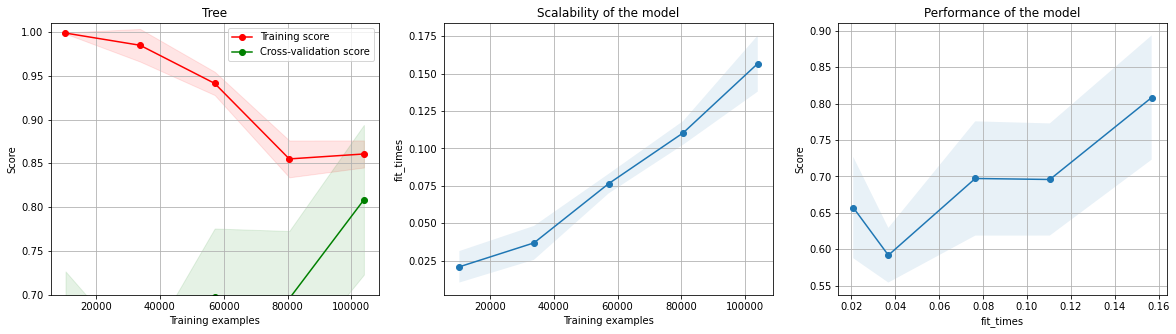

Precision: 0.7424618098952134
Best Estimator: RandomForestClassifier(max_features=0.2, n_estimators=30)


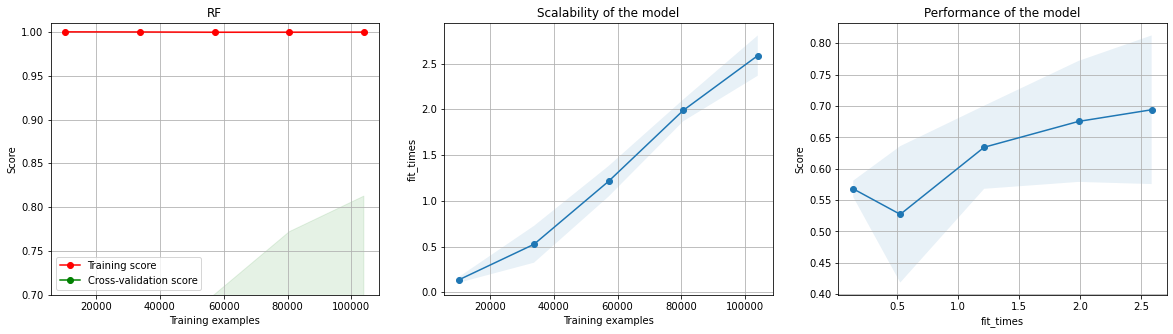

Precision: 0.8386136810354106
Best Estimator: AdaBoostClassifier(learning_rate=0.1, n_estimators=30)


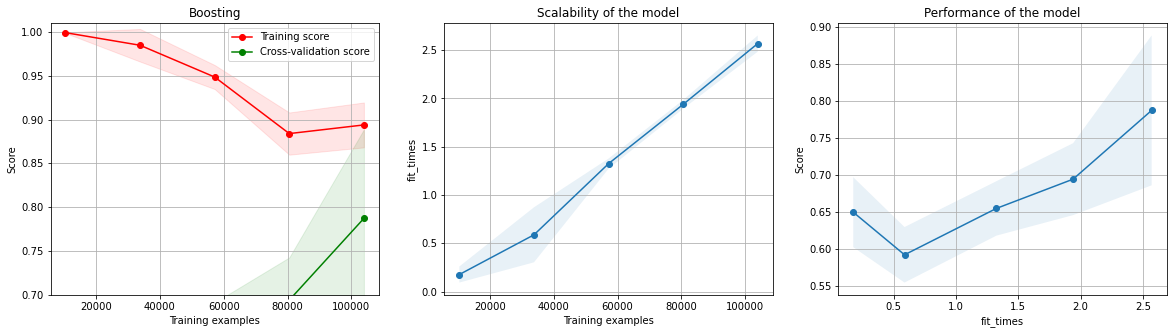

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Precision: 0.8108978266854676
Best Estimator: LogisticRegression(solver='newton-cg')


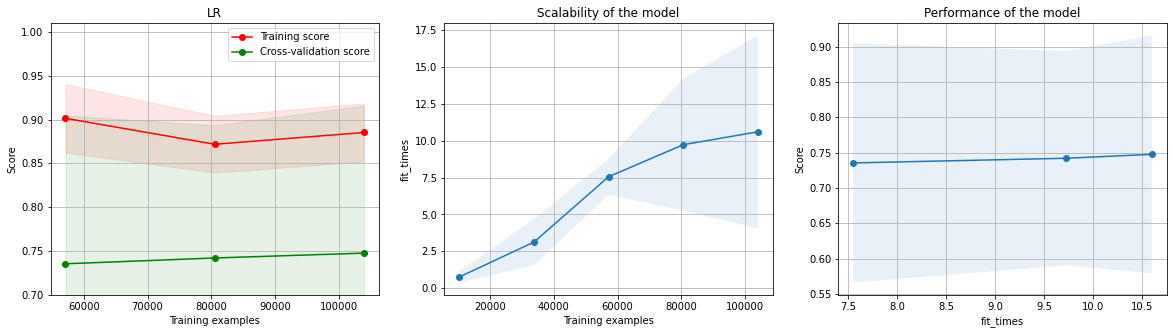

In [48]:
for i in trange(5):
        model = init_classifiers()[i][0]
        params = init_classifiers()[i][2]
        name = model_names[i]
        # will grid search through multiple hyperparameters to optimize the performance of each model
        clf = GridSearchCV(model,params,cv=5,scoring='precision')
        results = clf.fit(X, y)
        print(f'Precision: {results.best_score_}')
        estimator = results.best_estimator_
        print(f'Best Estimator: {estimator}')
        plot_learning_curve(estimator, name, X, y, (0.7, 1.01), n_jobs=-1)
        plt.show()

# Models selected - Models with best performance
---
### DecisionTreeClassifier has a precision of 83.98%
### AdaBoostClassifier has a precision of 83.86%

### DecisionTreeClassifier(max_depth=2, min_samples_split=3, random_state=1)

In [49]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=3, random_state=1)

In [50]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=3, random_state=1)

In [51]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., ..., 1., 0., 0.])

In [52]:
np.array(y_test)

array([0., 1., 0., ..., 1., 0., 0.])

In [53]:
clf.predict_proba(X_test)[:10]

array([[0.88082325, 0.11917675],
       [0.14988821, 0.85011179],
       [0.88082325, 0.11917675],
       [0.14988821, 0.85011179],
       [0.14988821, 0.85011179],
       [0.14988821, 0.85011179],
       [0.14988821, 0.85011179],
       [0.88082325, 0.11917675],
       [0.88082325, 0.11917675],
       [0.14988821, 0.85011179]])

In [54]:
clf.score(X_test,y_test)

0.8608058608058609

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)

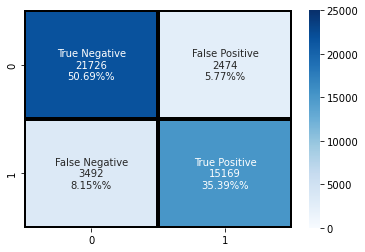

In [56]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=25000);

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     24200
         1.0       0.86      0.81      0.84     18661

    accuracy                           0.86     42861
   macro avg       0.86      0.86      0.86     42861
weighted avg       0.86      0.86      0.86     42861



In [58]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.860650947576615, 0.8553201798420802, 0.8574701247955911, None)

In [59]:
accuracy_score(y_test, y_pred)

0.8608058608058609

In [60]:
pickle.dump(clf, open('Tree.pkl', 'wb'))

In [61]:
Tree = pickle.load(open('Tree.pkl', 'rb'))
Tree.score(X_test, y_test)

0.8608058608058609

### AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1)

In [62]:
clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1)

In [63]:
clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1)

In [64]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [65]:
np.array(y_test)

array([0., 1., 0., ..., 1., 0., 0.])

In [66]:
clf.predict_proba(X_test)[:10]

array([[0.61892166, 0.38107834],
       [0.39545138, 0.60454862],
       [0.58740268, 0.41259732],
       [0.33452499, 0.66547501],
       [0.28029706, 0.71970294],
       [0.37961798, 0.62038202],
       [0.37961798, 0.62038202],
       [0.53274189, 0.46725811],
       [0.70220951, 0.29779049],
       [0.37213379, 0.62786621]])

In [67]:
clf.score(X_test,y_test)

0.8668019878210961

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)

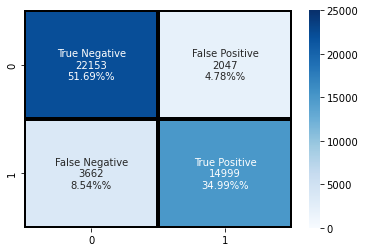

In [69]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=25000);

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     24200
         1.0       0.88      0.80      0.84     18661

    accuracy                           0.87     42861
   macro avg       0.87      0.86      0.86     42861
weighted avg       0.87      0.87      0.87     42861



In [71]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8690288328747526, 0.8595875397091473, 0.8629848136325617, None)

In [72]:
accuracy_score(y_test, y_pred)

0.8668019878210961

In [73]:
pickle.dump(clf, open('ADA.pkl', 'wb'))

In [74]:
ADA = pickle.load(open('ADA.pkl', 'rb'))
ADA.score(X_test, y_test)

0.8668019878210961

### It is imperative to not misclassify unsatisfied customers as satisfied because that would result in a higher churn rate, which means that we need to avoid false positives at all costs. Hence, precision is the most important score to evaluate in this business case. The AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1) seems to have the highest precision score.

# Final model selection
---
### I will once more train my data but on the entire dataset 

In [75]:
clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1)

In [76]:
clf.fit(X,y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=1)

In [77]:
pickle.dump(clf, open('ADA_Final.pkl', 'wb'))

In [78]:
ADA_Final = pickle.load(open('ADA_Final.pkl', 'rb'))

#### Now, to make predictions on future incoming data, use ADA_Final.predict()